<a href="https://colab.research.google.com/github/Epilef86/DNC/blob/main/Clusteriza%C3%A7%C3%A3o_Clusteriza%C3%A7%C3%A3o_Hier%C3%A1rquica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As características da clusterização hierárquica são:

1- Requer dados númericos contínuos na mesma escala
2- Requer definição das separações entre clusters
3- Responsável pelos famosos dendrogramas


Vantagens:

1- Possibilita a escolha dos clusters visualmente
2- Algoritmo simples e eficiente

Desvantagens:

1- Não escala bem pra um conjunto grande de dados
2- Conjunto grande de dados visualização dos gráficos fica ruim
3- Muito influenciável, dependendo da métrica que se está utilizando

Imagem de um dendograma, formato de árvore invertida

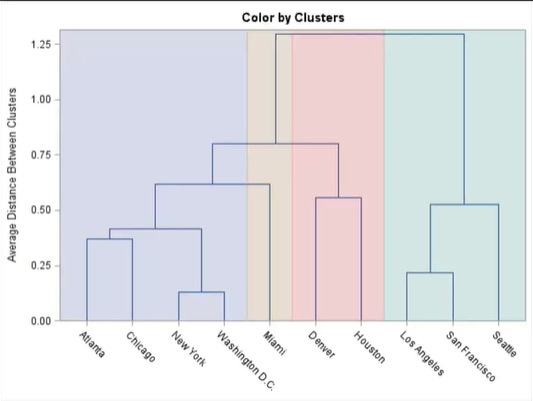

A interpretação pro dendograma é que geralmente ele organiza de modo que as observações mais próximas estejam uma ao lado da outras:

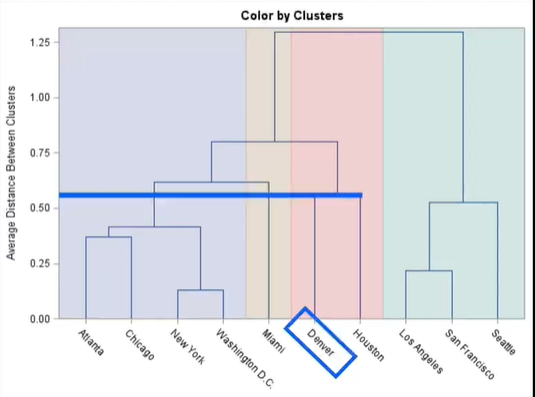


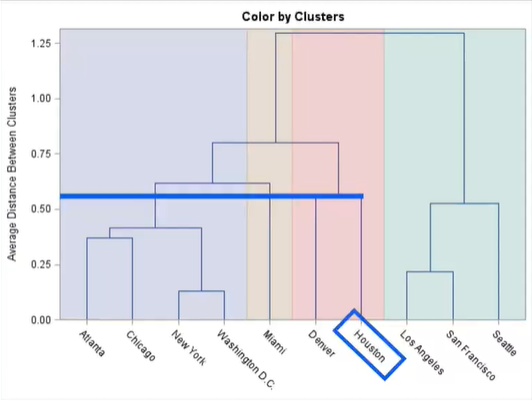

Só que idealmente mesmo pra verificarmos se está próxima ou não, temos que olhar o eixo y, que é a distância entre os clusters. Por exemplo, nova iorque está bem mais próximo de Washigton do que das outras cidades que estão relacionadas entre si. Depois disso vem Los Angelies com San Francisco. Mais próximas relacionadas aos inputs que estou utilizando

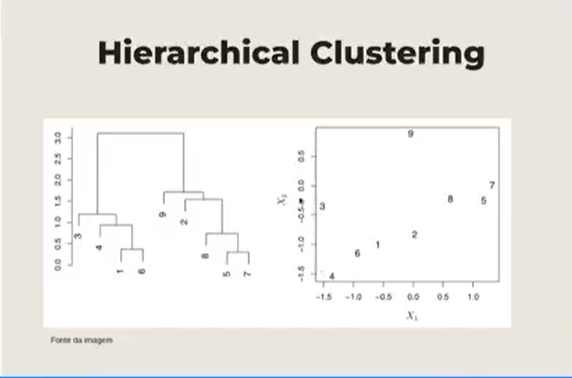

No painel direito da imagem acima temos duas variáveis X1 e X2. Com a clusterização hierárquica das disposições de dados vai ser gerado o dendograma a esquerda. 
Primeiro ele vê uma matriz de distância entre todas as observações e vê qual a que está mais próxima entre si. Então, olhando vemos que o 7 e 5 e o 1 e 6, estão bem próximos. Então 7 e 5 são os que agregam primeiro e o 1 e 6 agragam logo a seguir. 
Esse modo método de clusterização hierárquica é chamado de aglomerativo ou burn up, pq ele pega as observações todas separadas e começa a aglomerar

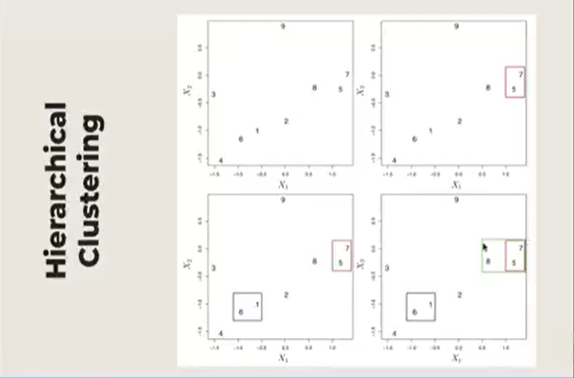

Observe que depois de pegar o 7 e 5 e o 1 e 6, ele verifica que o 8 está próximo do 7 e 5. O 7 e 5 formaram uma coisa só. Qual que a distância até o 8, essa distância é chamada de linkage:

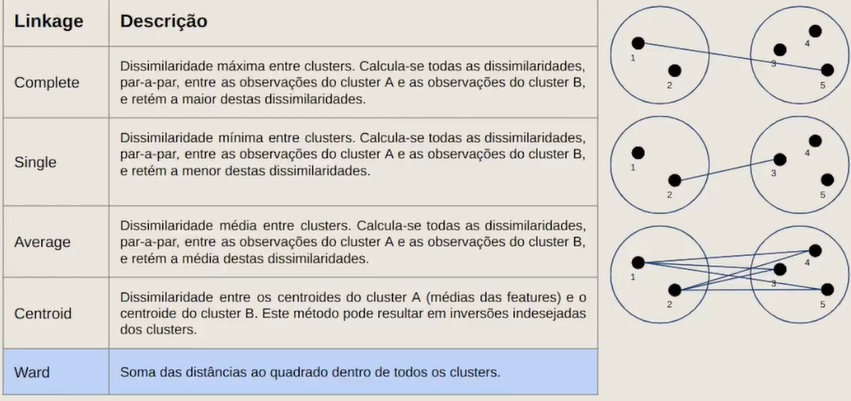

Complete:

Pra calcular a distância entre um conglomerado e outro ponto ou bloco vamos considerar a distância maior


Single:

É o oposto do complete, vai pegar os pontos mais próximos

Average:

Pega a média de todas as dissimilaridades possíveis desse clusters com os outros e 


Centroid:

Pega os pontos centrais entre os pontos dentro de cada clusters. E depois calcular a distância de cada ponto central dos clusters.



Obs: as mais utilizadas são complete, single e ward

Exemplo de como se monta um dendograma:

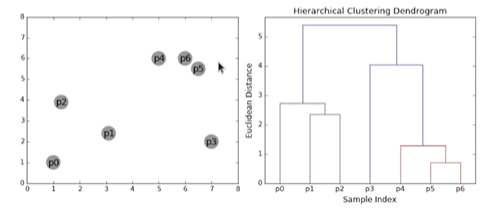


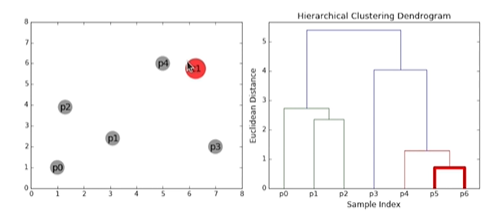


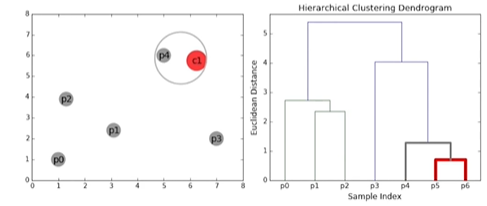


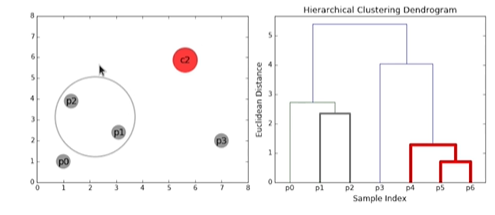

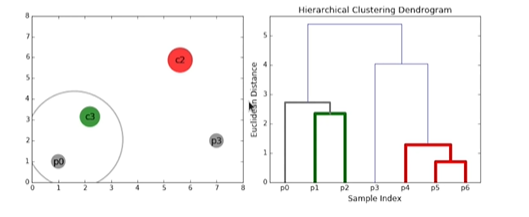


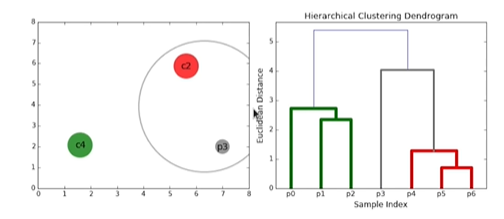

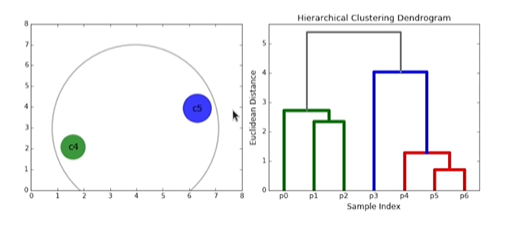

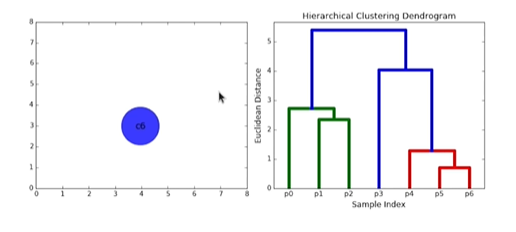



PRÁTICA

Pra dados pequenos a clusterização hierárquica é super recomendada

n_samples=80 --> 80 observações
n_features=2 --> 2 características 
centers=4 --> 4 grupos 
cluster_std = 0.6 desvio padrão nesses grupos

In [27]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Didatic purposes
import string
from ipywidgets import interact

In [28]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [29]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=.6, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-1.710205,8.159010
1,-0.397014,2.109227
2,-1.148252,8.216479
3,2.334665,-0.024083
4,-1.347961,3.713714


Agora vamos ver como que faz com o algotimo sklearn

In [30]:
# Hierarchical clustering with sklearn
model = AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(X)

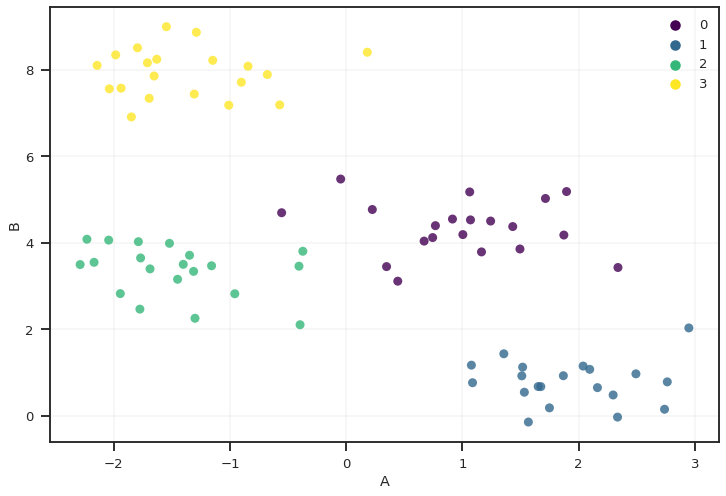

In [31]:
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs);

Os dados do gráfico acima são os originais, observe que os desvios padrãoes estão um pouco extenso

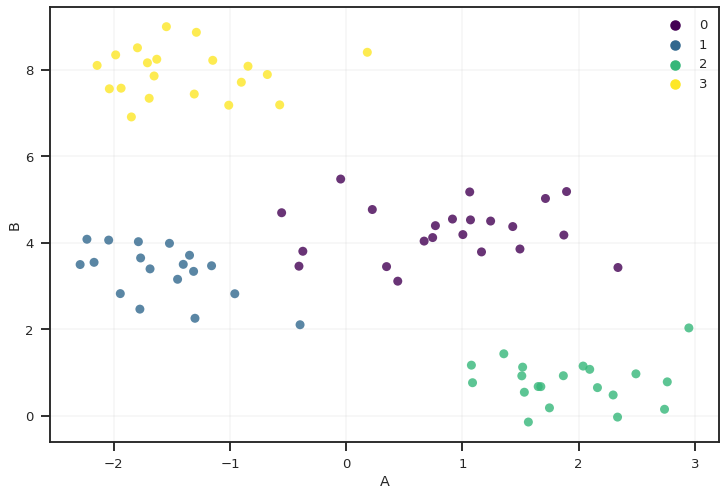

In [32]:
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

Os dados do gráfico acima é quando aplicado a clusterização hierárquica

Agora podemos fazer usando o scipy

In [33]:
# Hierarchical clustering with scipy

Primeira coisa que o scipy pede é uma matriz de distâncias.
Aqui linkage(df, method='ward') calcula o linkage no conjunto de dados

dendrogram_dict = dendrogram(Z, color_threshold=10) to salvando esses dados do dendograma e por pdrão ele faz um plote automaticamente

 color_threshold=10 é o ponto de corte

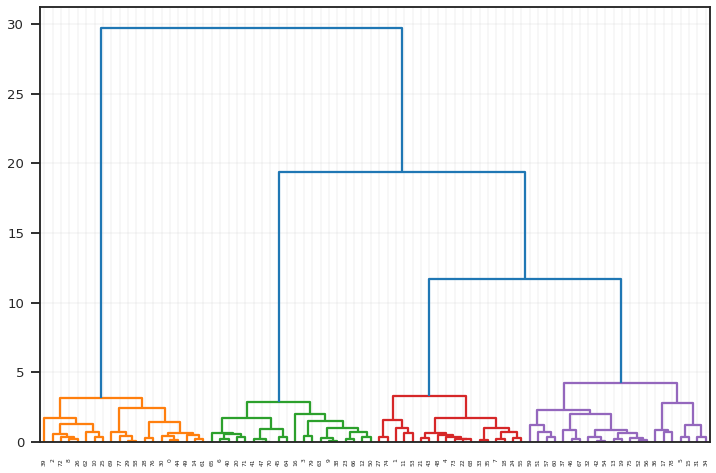

In [34]:
Z = linkage(df, method='ward')
dendrogram_dict = dendrogram(Z, color_threshold=10)
plt.show()

Passando uma função que foi carregada lá em cima chama fcluster e coloca a quantidade de grupo que eu quero e a quantidade máxima de cluster que eu quero.Ele vai retornar pra cada observação qual cluster que ele pertence. 

In [35]:
fcluster(Z, 4, criterion='maxclust')

array([1, 3, 1, 2, 3, 4, 2, 3, 1, 2, 1, 3, 2, 4, 1, 4, 2, 4, 3, 4, 2, 3,
       3, 2, 3, 1, 1, 3, 1, 1, 1, 4, 4, 3, 4, 3, 4, 4, 2, 1, 2, 2, 4, 3,
       1, 2, 4, 2, 3, 1, 2, 4, 4, 3, 4, 3, 4, 4, 1, 4, 4, 1, 1, 2, 2, 2,
       2, 4, 3, 1, 2, 2, 1, 3, 3, 4, 1, 1, 4, 2], dtype=int32)

Vou fazer um plot adicional interativo

In [36]:
@interact(method=['single','complete','centroid', 'ward'])
def plot_dendrogram(method):
  Z = linkage(df, method=method)
  dendrogram_dict = dendrogram(Z)
  plt.show()

interactive(children=(Dropdown(description='method', options=('single', 'complete', 'centroid', 'ward'), value…